In [1]:
from IPython.display import display, Math

In [2]:
# As seguintes librarias serão necessárias para resolver os exercícios
import numpy as np # O numpy permite efetuar cálculos de forma eficiente
                   # sobre vários números (arrays)
import matplotlib.pyplot as plt # O matplotlib e o seu módulo pyplot oferecem
                                # uma interface simples para gerar gráficos

In [3]:
# Define uma função para calcular a regressão linear para não estar sempre a refaze-la
import numpy.typing as npt
from dataclasses import dataclass


@dataclass
class LinRegResult:
    m: float
    b: float
    r2: float
    delta_m: float
    delta_b: float

    def apply(self, x: float | npt.NDArray) -> float | npt.NDArray:
        return self.m * x + self.b

    def dump(self):
        print(f"m={self.m}")
        print(f"b={self.b}")
        print(f"r²={self.r2}")
        print(f"Δm={self.delta_m}")
        print(f"Δb={self.delta_b}")


def linreg(x: npt.ArrayLike, y: npt.ArrayLike) -> LinRegResult:
    assert np.size(x) == np.size(y)

    data_points = np.size(x)
    
    mul_sum = np.sum(np.multiply(x, y))
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    m_numerator = data_points * mul_sum - x_sum * y_sum
    
    x2_sum = np.sum(np.square(x))
    x_sum2 = np.square(np.sum(x))
    x_denom = data_points * x2_sum - x_sum2
    
    y2_sum = np.sum(np.square(y))
    y_sum2 = np.square(np.sum(y))
    y_denom = data_points * y2_sum - y_sum2
    
    m = m_numerator / x_denom
    b = (x2_sum * y_sum - x_sum * mul_sum) / x_denom
    
    r2 = m_numerator**2 / (x_denom * y_denom)
    
    delta_m = np.absolute(m) * np.sqrt((1 / r2 - 1) / (data_points - 2))
    delta_b = delta_m * np.sqrt(x2_sum / data_points)

    return LinRegResult(m=m, b=b, r2=r2, delta_m=delta_m, delta_b=delta_b)


# Exercício 1

Numa experiência de difração de um feixe de luz por uma fenda única foram medidos 7 pares de valores (na tabela) da distância
da fonte de luz ao alvo, 𝐿, e a distância entre máximos luminosos consecutivos (entre a mancha vermelha central e as outras
manchas vermelhas) da figura de difração, 𝑋,

|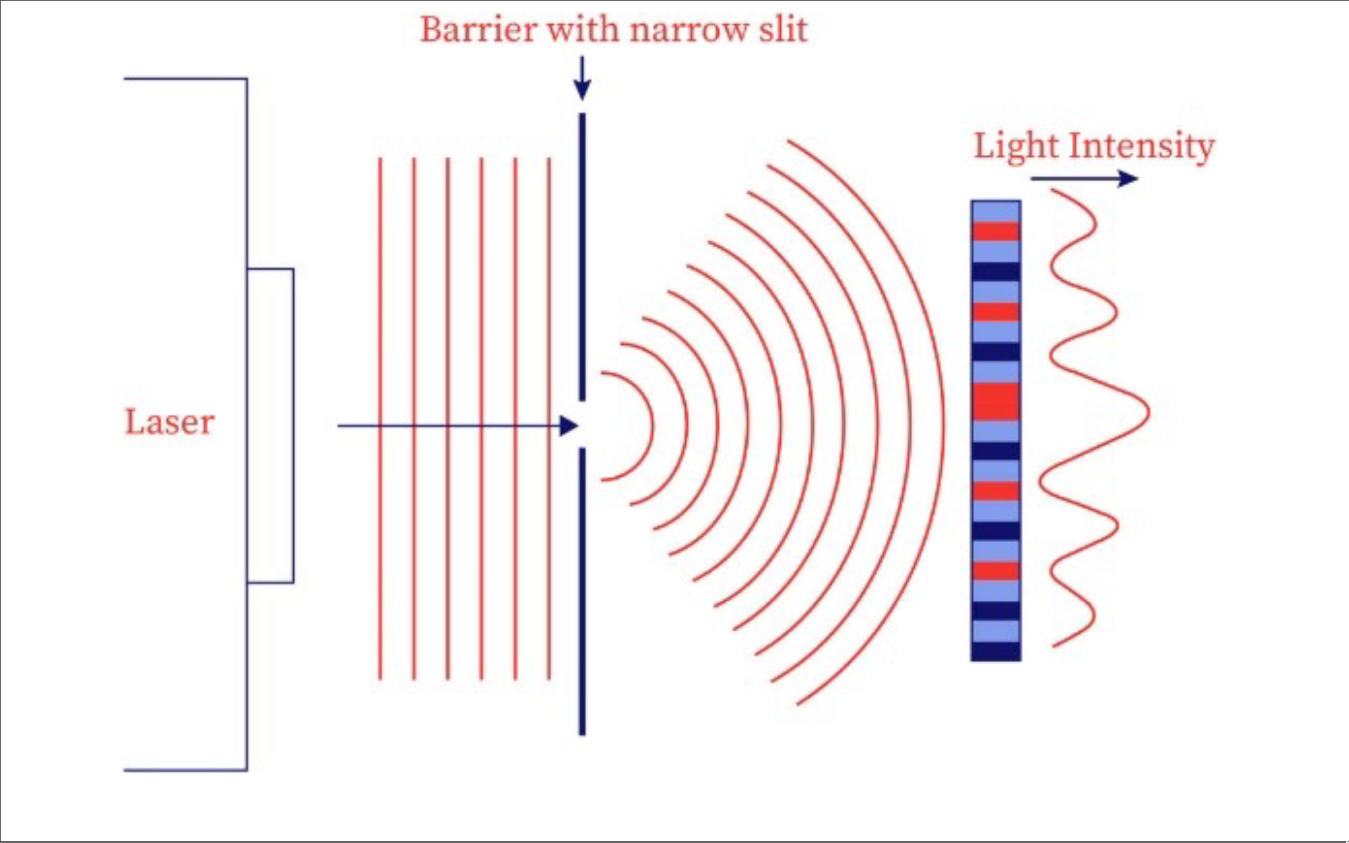|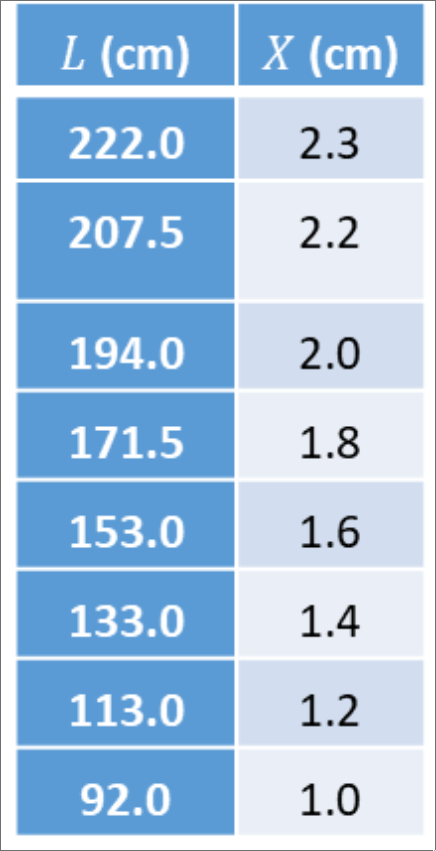
|-|-

**Escreva um programa em python** que calcule as quantidades anteriores (valores da regressão linear).

a) Comece por representar os dados experimentais num gráfico.

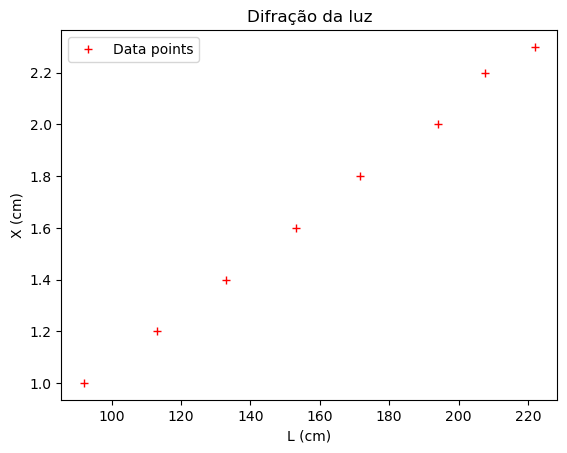

In [4]:
# Convertemos os dados experimentais em dois arrays do numpy
# Aqui L vai ser as nossas abcissas pois é variável independente enquanto
# que X é a variável de dependente de L (pois X é consequênciade L e nós
# manipulamos L)
x = np.array([222.0, 207.5, 194.0, 171.5, 153.0, 133.0, 113.0, 92.0]) # L (cm)
y = np.array([2.3, 2.2, 2.0, 1.8, 1.6, 1.4, 1.2, 1.0]) # X (cm)

# Agora adicionamos os pontos a um novo gráfico
#
# O "r+" diz ao pyplot para desenhar os nossos valores a vermelho
# e representá-los com um sinal de mais (+).
# O label dá um nome a linha que desenhamos, este nome pode depois
# ser apresentado no gráfico
plt.plot(x, y, "r+", label="Data points")
# Adicionamos as legendas do eixos
plt.xlabel("L (cm)")
plt.ylabel("X (cm)")
# Este comando diz ao pyplot para mostrar as labels da nossas linhas
# no canto superior esquerdo
plt.legend(loc="upper left")
# Este comando adiciona um título ao gráfico
plt.title("Difração da luz")
# Apresentamos o gráfico
plt.show()

b) Calcular as somas das expressões acima.

In [5]:
# np.multiply calcula a multiplicação elemento a elemento de dois arrays
# retornando um array com os resultados, np.sum soma todos os elementos
# de um array e retorna o número que resulta disso.
mul_sum = np.sum(np.multiply(x, y))
x_sum = np.sum(x)
y_sum = np.sum(y)
# np.square calcula o quadrado para cada elemento do array retornando
# um novo array com os resultados.
x2_sum = np.sum(np.square(x))
x_sum2 = np.square(np.sum(x))

In [6]:
display(Math(r'\sum_{{i=1}}^N x_i y_i = {:.1f}'.format(mul_sum)))
display(Math(r'\sum_{{i=1}}^N x_i = {:.1f}'.format(x_sum)))
display(Math(r'\sum_{{i=1}}^N y_i = {:.1f}'.format(y_sum)))
display(Math(r'\sum_{{i=1}}^N x^2_i = {:.1f}'.format(x2_sum)))
display(Math(r'\left( \sum_{{i=1}}^N x_i \right)^2 = {:.1f}'.format(x_sum2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

c) De seguida calcule o declive, a ordenada na origem e o coeficiente de determinação ou de correlação $r^2$

In [7]:
# np.size dá o número de elementos que um array contém, também podemos
# utilizar a função len do python aqui (ex. len(x)).
data_points = np.size(x)

# Começamos por calcular o numerador do declive, esta quantidade vai
# ser necessária para calcular outros valores por isso guardamos numa
# variável de como a não ter de a recalcular.
m_numerator = data_points * mul_sum - x_sum * y_sum
# O denominador do declive também vai ser reutilizado.
x_denom = data_points * x2_sum - x_sum2
# Agora que temos o numerador e o denominador apenas precisamos de
# dividir para obter o declive.
m = m_numerator / x_denom

# Calculamos agora a ordenada na origem.
b = (x2_sum * y_sum - x_sum * mul_sum) / x_denom

# O coeficiente de correlação necessita também de uma quantidade que
# se calcula do mesmo modo que o denominador do declive só que y em
# vez de x.
y2_sum = np.sum(np.square(y))
y_sum2 = np.square(np.sum(y))
y_denom = data_points * y2_sum - y_sum2

# Calculamos agora o coeficiente de determinação.
r2 = m_numerator**2 / (x_denom * y_denom)

In [8]:
display(Math(r'm = {:.8f}'.format(m)))
display(Math(r'b = {:.8f}'.format(b)))
display(Math(r'r^2 = {:.8f}'.format(r2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A seguir calculamos também o valor do erro tanto para o declive como para a ordenada na origem

In [9]:
# Começamos por calcular o error do declive
# O np.absolute retorna o valor absoluto do número inserido e o np.sqrt
# calcula e retorna a raiz quadrada do número inserido.
delta_m = np.absolute(m) * np.sqrt((1 / r2 - 1) / (data_points - 2))
# Concluímos calculando o erro da ordenada na origem
delta_b = delta_m * np.sqrt(x2_sum / data_points)

In [10]:
display(Math(r'\Delta m = {:.8f}'.format(delta_m)))
display(Math(r'\Delta b = {:.8f}'.format(delta_b)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

d) faça um gráfico com os pontos experimentais e a reta cujos parâmetros m e b calculou anteriormente.

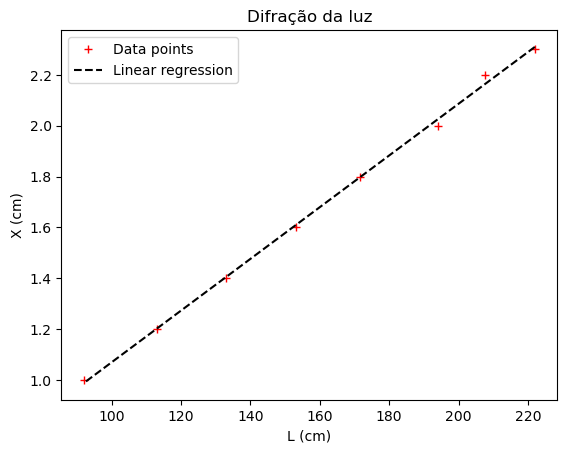

In [11]:
# Voltamos a definir o gráfico como fizemos anteriormente
plt.plot(x, y, "r+", label="Data points")
# Mas agora adicionamos outra linha para a regressão linear
# O formato da reta de regressão linear é mx+b
# "--k" Significa desenhar a tracejado com linha preta
plt.plot(x, m * x + b, "--k", label="Linear regression")
plt.xlabel("L (cm)")
plt.ylabel("X (cm)")
plt.legend(loc="upper left")
plt.title("Difração da luz")
plt.show()

e) Encontre o valor de 𝑋, quando 𝐿 = 165.0 cm. Use a reta determinada pela regressão linear.

In [12]:
# A reta da regressão linear é definida como
# y = mx+b, para calcular um valor de y para
# um dado x basta substituir na expressão
X = m * 165 + b

In [13]:
display(Math(r'X = {:.2f} \text{{cm}}'.format(X)))

<IPython.core.display.Math object>

f) Afaste da reta encontrada um dos valores medidos de 𝑦. Compare o coeficiente de determinação com o valor anterior. Faça
um gráfico com os novos pontos experimentais e a nova reta.

In [14]:
# Os mesmos valores de y exceto o primeiro que foi alterado
y = np.array([2.8, 2.2, 2.0, 1.8, 1.6, 1.4, 1.2, 1.0]) # X (cm)

# Voltamos a calcular a regressão linear

# Voltamos a desenhar o gráfico

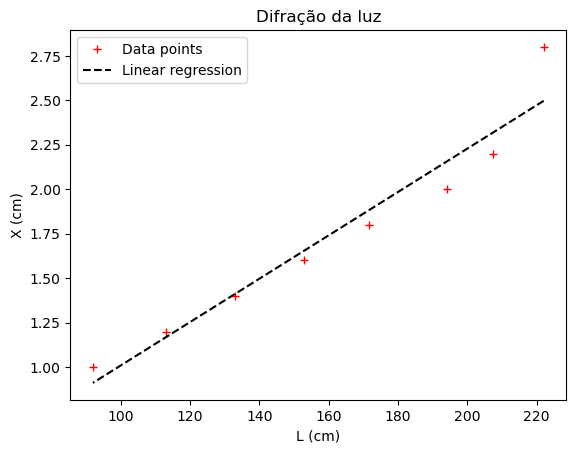

In [15]:
reg = linreg(x, y)

plt.plot(x, y, "r+", label="Data points")
plt.plot(x,reg.apply(x), "--k", label="Linear regression")
plt.xlabel("L (cm)")
plt.ylabel("X (cm)")
plt.legend(loc="upper left")
plt.title("Difração da luz")
plt.show()

In [16]:
display(Math(r'r^2 = {:.8f}'.format(r2)))
display(Math(r'r^2 = {:.8f} \, \text{{(novo)}}'.format(reg.r2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Como podemos observar a nova reta apresenta um coeficiente de correlação ($r^2$) menor do que o da primeira reta, o que resulta
na reta ficar mais distante de alguns pontos experimentais.

# Exercício 2

Um ciclista tenta percorrer a velocidade constante (uniforme) uma distância de 10 km.
O seu treinador nos primeiros 9 minutos e a cada minuto mede a distância percorrida, e regista os valores em km:

|  |  |  |  |  |  |  |  |  |  |  |
| - | - | - | - | - | - | - | - | - | - | - |
| 0.00 | 0.735 | 1.363 | 1.739 | 2.805 | 3.814 | 4.458 | 4.955 | 5.666 | 6.329|

Antes de mais vamos passar estes dados para python

In [17]:
# np.arange(start, end, step é semelhante a função range do python,
# esta função cria um array com o primeiro valor igual a start e todos
# os restantes ate end (exclusivo) sendo o valor anterior mais step.
x = np.arange(0, 10, 1) # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = np.array([0.00, 0.735, 1.363, 1.739, 2.805, 3.814, 4.458, 4.955, 5.666, 6.329])

a) Apresente estas medições num gráfico. A analisar o gráfico, a relação entre o tempo e a distância percorrida é linear?

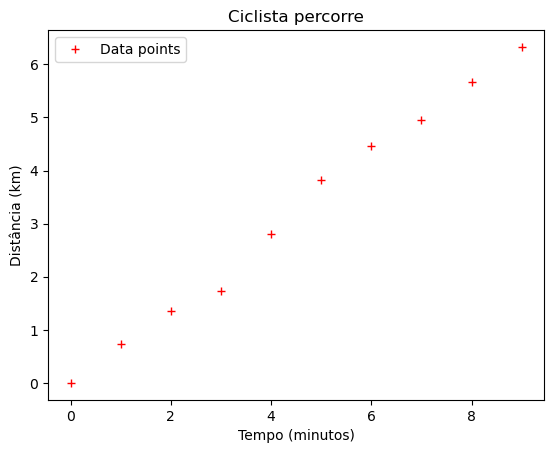

In [18]:
plt.plot(x, y, "r+", label="Data points")
plt.xlabel("Tempo (minutos)")
plt.ylabel("Distância (km)")
plt.legend(loc="upper left")
plt.title("Ciclista percorre")
plt.show()

A relação entre o tempo e a distância percorrida aparenta ser linear

b) Encontre o declive, a ordenada na origem, os erros respetivos e o coeficiente de determinação.

É uma relação linear bem aproximada? O ciclista conseguiu manter a mesma velocidade uniforme durante o percurso?

In [19]:
# Calculamos a regressão linear

In [20]:
reg = linreg(x, y)
display(Math(r'm = {:.8f}'.format(reg.m)))
display(Math(r'b = {:.8f}'.format(reg.b)))
display(Math(r'r^2 = {:.8f}'.format(reg.r2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Como o coeficiente de determinação é tão alto podemos assumir que é uma relação linear bem aproximada e que o ciclista consegui manter uma velocidade mais ao menos uniforme durante todo o percurso.

c) Qual a velocidade média do ciclista?

Se assumirmos uma velocidade uniforme (o que fazemos quando calculamos uma velocidade média)
então a posição do ciclista é dada pela função $y = vt$, onde $v$ é a velocidade média e $t$
é o tempo, logo a velocidade média do ciclista pode ser extraída do declive da reta de regressão
linear, sendo assim a sua velocidade média $\approx 0.71881212 \; \text{km/min}$

d) Use a função polyfit dos pacote numpy ou do pacote pylab para encontrar a reta que mais se aproxima das medições.

O declive e a ordenada na origem concordam com os valores calculados na alínea b)?

In [21]:
# np.polyfit(x, y, deg) tenta calcular o polinómio de grau `deg`
# que mais se aproxima dos dados experimentais passados.
# Como no enunciado é pedido para "encontrar a reta que mais se
# aproxima" sabemos que o grau do polinómio é 1.
(m, b) = np.polyfit(x, y, 1)

In [22]:
display(Math(r'm = {:.8f}'.format(m)))
display(Math(r'b = {:.8f}'.format(b)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Os valores são exatamente iguais aos valores que calculamos anteriormente (esperado).

e) Apresente a velocidade em km/hora.

$$
0.71881212 \; \left( \text{km/min} \right) * 60 = 43.1287272 \; \left( \text{km/h} \right)
$$

# Exercício 3

Foi medida a energia por segundo (potência) emitida por um corpo negro (corpo que absorve toda a energia que incide
nele) de área $100 \; \text{cm}^2$ em função da temperatura absoluta, $T$, e registada na seguinte tabela

|  |  |  |  |  |  |  |  |  |  |  |
| - | - | - | - | - | - | - | - | - | - | - |
| T(K) | 200 | 300 | 400 | 500 | 600 | 700 | 800 | 900 | 1000 | 1100 |
| E(J) | 0.6950 | 4.363 | 15.53 | 38.74 | 75.08 | 125.2 | 257.9 | 344.1 | 557.4 | 690.7 |

a) Apresente estas medições num gráfico. A analisar o gráfico, a relação entre a energia emitida e a temperatura é linear?

In [23]:
x = np.array([200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100])
y = np.array(
    [0.6950, 4.363, 15.53, 38.74, 75.08, 125.2, 257.9, 344.1, 557.4, 690.7]
)

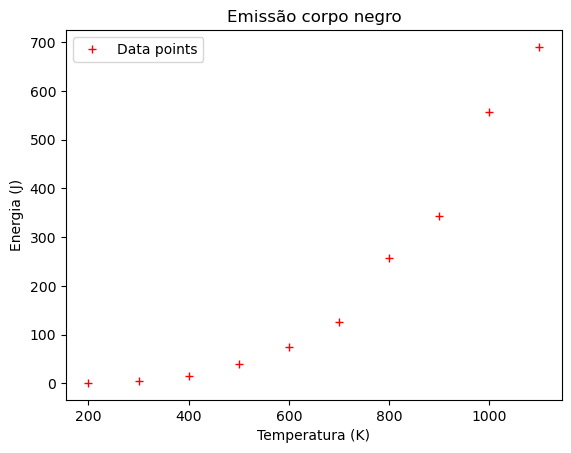

In [24]:
plt.plot(x, y, "r+", label="Data points")
plt.xlabel("Temperatura (K)")
plt.ylabel("Energia (J)")
plt.legend(loc="upper left")
plt.title("Emissão corpo negro")
plt.show()

Para determinarmos se a relação entre a energia emitida e a temperatura é linear, podemos calcular o coeficiente de determinação da regressão linear.

In [25]:
reg = linreg(x, y)
display(Math(r'r^2 = {:.8f}'.format(reg.r2)))

<IPython.core.display.Math object>

O valor do coeficiente indica que a relação não aparente ser linear, podemos verificar isto observando o gráfico da regressão linear e notando que a reta diverge em muito dos pontos.

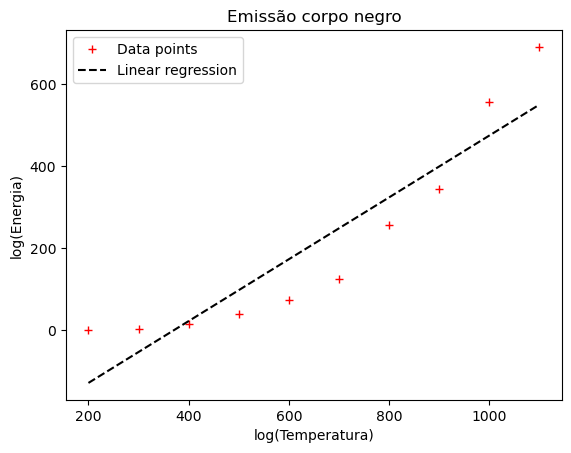

In [26]:
plt.plot(x, y, "r+", label="Data points")
plt.plot(x, reg.apply(x), "--k", label="Linear regression")
plt.xlabel("log(Temperatura)")
plt.ylabel("log(Energia)")
plt.legend(loc="upper left")
plt.title("Emissão corpo negro")
plt.show()

b) Apresente as medições num gráfico log-log. Qual a dependência entre as quantidade energia emitida e a temperatura?

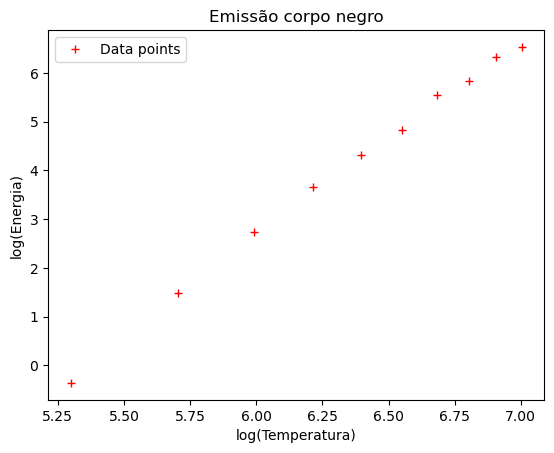

In [27]:
logx = np.log(x)
logy = np.log(y)

plt.plot(logx, logy, "r+", label="Data points")
plt.xlabel("log(Temperatura)")
plt.ylabel("log(Energia)")
plt.legend(loc="upper left")
plt.title("Emissão corpo negro")
plt.show()

A relação entre os logaritmos dos valores experimentais aparenta ser linear, podemos verificar isto olhando para o gráfico da regressão linear e o seu coeficiente de determinação.

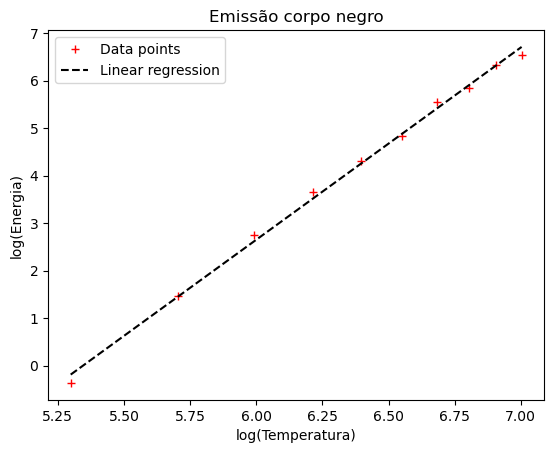

<IPython.core.display.Math object>

In [28]:
reg = linreg(logx, logy)

plt.plot(logx, logy, "r+", label="Data points")
plt.plot(logx, reg.apply(logx), "--k", label="Linear regression")
plt.xlabel("log(Temperatura)")
plt.ylabel("log(Energia)")
plt.legend(loc="upper left")
plt.title("Emissão corpo negro")
plt.show()

m = reg.m
b = reg.b

display(Math(r'r^2 = {:.8f}'.format(reg.r2)))

Verifica-se que o gráfico log-log apresenta uma relação linear, logo o gráfico original terá uma relação de potência $y = cx^n$, estes valores podem ser calculados da seguinte forma:

$$
c = e^b \quad n = m
$$

Onde $b$ e $m$ são a ordenada na origem e o declive da regressão linear do gráfico log-log.

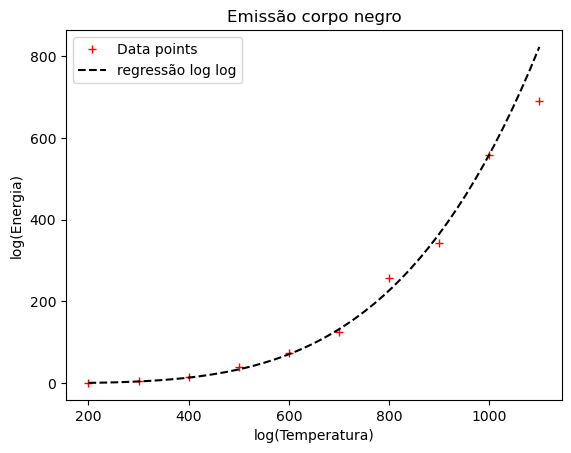

In [29]:
# np.exp calcula o exponencial do valor (e**b) passado
c = np.exp(b)
n = m

plt.plot(x, y, "r+", label="Data points")
# np.linspace(min, max, [points]) cria um array com `points`
# elementos que estão espaçados igualmente entre si desde
# `min` até `max`.
# Utilizamos isto porque o pyplot interpola linearmente os
# valores para fazer os gráficos, no entanto dados os poucos
# dados que temos, isto faria com que o gráfico da potência
# ficasse com muitos segmentos visíveis.
x_fitted = np.linspace(np.min(x), np.max(x))
plt.plot(x_fitted, c * x_fitted**n, "--k", label="regressão log log")
plt.xlabel("log(Temperatura)")
plt.ylabel("log(Energia)")
plt.legend(loc="upper left")
plt.title("Emissão corpo negro")
plt.show()

Logo a dependência entre a energia emitida e a temperatura é a seguinte (onde $x$ é a temperatura e $y$ é a energia emitida):

In [30]:
display(Math(r'y = cx^n = {:.10f}x^{{ {:.8f} }}'.format(c, n)))

<IPython.core.display.Math object>

# Exercício 4

Foi medida a atividade de uma amostra do isótopo radioativo $^{131}\text{I}$ tem de 5 em 5 dias. Os valores medidos da atividade com
o tempo são, em mCi:

|  |  |  |  |  |  |  |  |  |  |
| - | - | - | - | - | - | - | - | - | - |
| 9.676 | 6.355 | 4.261 | 2.729 | 1.862 | 1.184 | 0.7680 | 0.4883 | 0.3461 | 0.2119 |

a) Apresente estas medições num gráfico. A analisar o gráfico, a relação entre a atividade e o tempo é linear?

In [31]:
t = np.arange(0, 50, 5)
y = np.array(
    [9.676, 6.355, 4.261, 2.729, 1.862, 1.184, 0.7680, 0.4883, 0.3461, 0.2119]
)

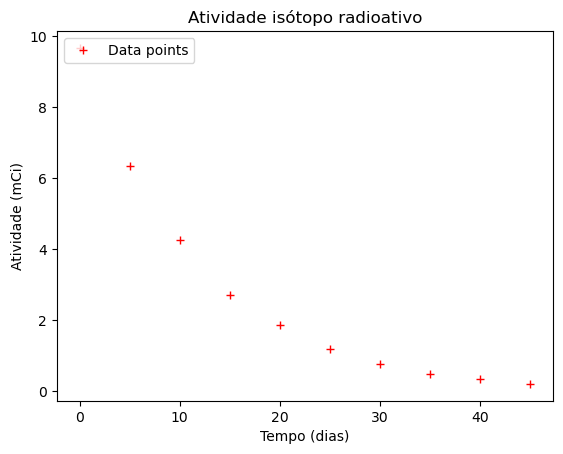

In [32]:
plt.plot(t, y, "r+", label="Data points")
plt.xlabel("Tempo (dias)")
plt.ylabel("Atividade (mCi)")
plt.legend(loc="upper left")
plt.title("Atividade isótopo radioativo")
plt.show()

Calculando agora a regressão linear e o seu coeficiente de determinação.

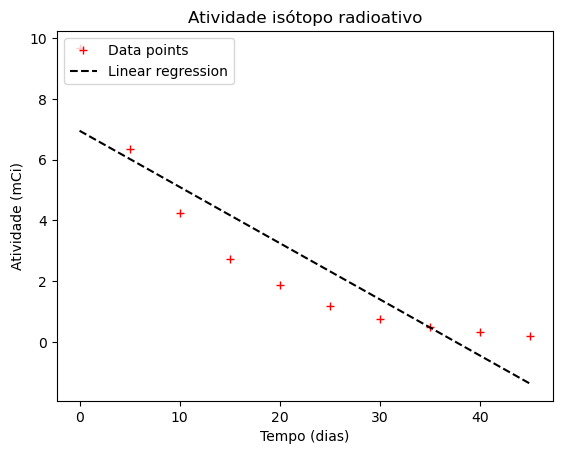

<IPython.core.display.Math object>

In [33]:
reg = linreg(t, y)

plt.plot(t, y, "r+", label="Data points")
plt.plot(t, reg.apply(t), "--k", label="Linear regression")
plt.xlabel("Tempo (dias)")
plt.ylabel("Atividade (mCi)")
plt.legend(loc="upper left")
plt.title("Atividade isótopo radioativo")
plt.show()

display(Math(r'r^2 = {:.8f}'.format(reg.r2)))

Como podemos ver a relação entre a atividade e o tempo é não linear.

b) Apresente as medições num gráfico semilog. Como depende a atividade com o tempo?

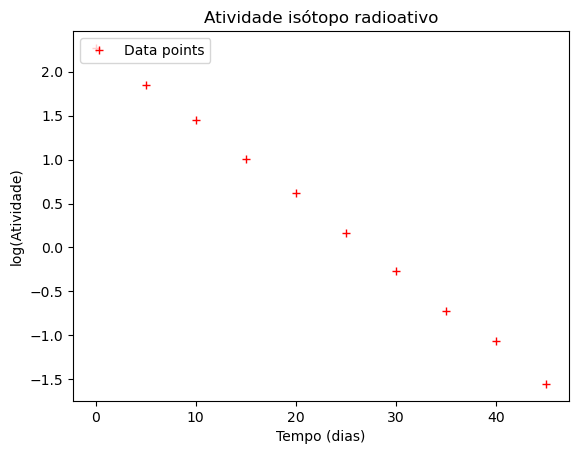

In [34]:
logy = np.log(y)

plt.plot(t, logy, "r+", label="Data points")
plt.xlabel("Tempo (dias)")
plt.ylabel("log(Atividade)")
plt.legend(loc="upper left")
plt.title("Atividade isótopo radioativo")
plt.show()

O gráfico semilog parece estabelecer uma relação linear entre os seus eixos, mas podemos confirmar isto calculando a regressão linear e o seu coeficiente de determinação.

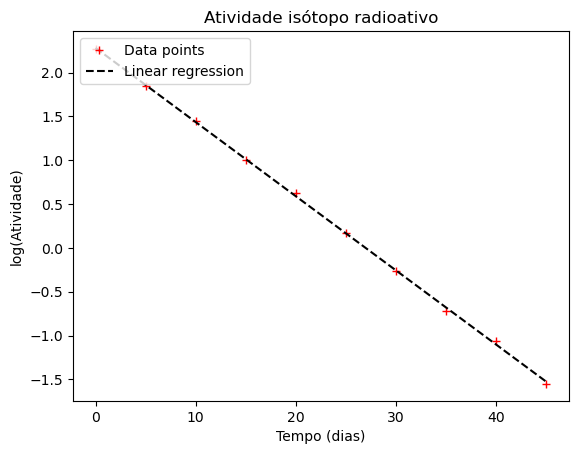

<IPython.core.display.Math object>

In [35]:
reg = linreg(t, logy)

plt.plot(t, logy, "r+", label="Data points")
plt.plot(t, reg.apply(t), "--k", label="Linear regression")
plt.xlabel("Tempo (dias)")
plt.ylabel("log(Atividade)")
plt.legend(loc="upper left")
plt.title("Atividade isótopo radioativo")
plt.show()

m = reg.m
b = reg.b

display(Math(r'r^2 = {:.8f}'.format(reg.r2)))

Verifica-se que o gráfico semilog apresenta uma relação linear, logo o gráfico original terá uma relação exponencial do tipo $y = y_0e^{\lambda t}$, estes valores podem ser calculados da seguinte forma:

$$
y_0 = e^b \quad \lambda = m
$$

Onde $b$ e $m$ são a ordenada na origem e o declive da regressão linear do gráfico semilog.

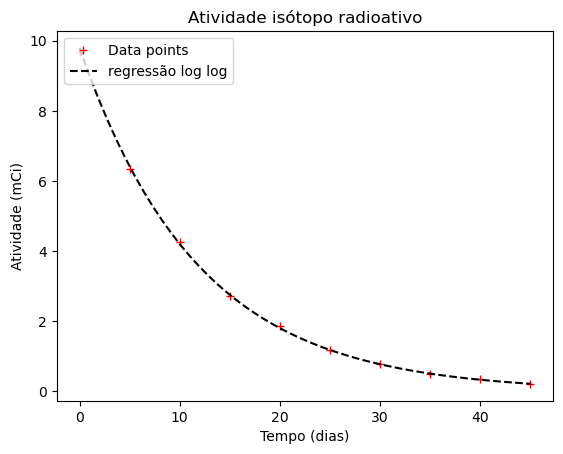

In [36]:
y_0 = np.exp(b)
lam = m

plt.plot(t, y, "r+", label="Data points")
t_fitted = np.linspace(np.min(t), np.max(t))
plt.plot(t_fitted, y_0 * np.exp(lam * t_fitted), "--k", label="regressão log log")
plt.xlabel("Tempo (dias)")
plt.ylabel("Atividade (mCi)")
plt.legend(loc="upper left")
plt.title("Atividade isótopo radioativo")
plt.show()

Logo a dependência entre a atividade e o tempo é a seguinte (onde $t$ é o tempo e $y$ é a atividade):

In [37]:
display(Math(r'y = y_0e^{{ \lambda t }} = {:.8f}e^{{ {:.8f}t }}'.format(y_0, lam)))

<IPython.core.display.Math object>